In [255]:
import numpy as np
import pandas as pd
import csv
import string
import sys #para resolver os emoji's
import nltk
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
%matplotlib inline


In [256]:
tweet_tokenizer = TweetTokenizer()

In [257]:
list_words = ['governo']
arquivo_csv = 'GovernoAbril.csv'

In [258]:
dtframe = pd.read_csv(arquivo_csv, encoding='UTF-8')

In [259]:
dtframe

,name,screen_name,location,followers_count,friends_count,tweet
0,BBC News Brasil,bbcbrasil,"Londres, GB, e São Paulo, BR",2149401,883,#ArquivoBBC Há 50 anos o governo investe pesad...
1,Jorge AM,jorge_am_,"Canoas, Brasil",162,178,RT @VeraSilvaCamarg: Demonstrem com atitudes q...
2,Julia �,fucklouistz,bts • sg • dl • oned • zm • gh,4687,3613,RT @acababolso: 1366 dias para o fim do govern...
3,Ivana Campos,yvanacampos,Brasil- RJ,308,454,@andrizek Essa gente só pode ser doente. Vivem...
4,persona�,medllen,NaN,246,368,"RT @LoveYouJoonie: Então, está acontecendo um ..."
5,Presidente da Ursal,blogdoeg,"Recife, Brasil",2629,1559,"Tudo que eu deitei sobre o governo Bolsonaro, ..."
6,antonio evandro,evandro_bv,Brasíl,87,236,"RT @jairbolsonaro: Hoje, foram arrendados mais..."
7,WILLIAM ALMEIDA,WILLIAMENGCIVIL,"São Paulo, Brasil",94,351,RT @SF_Moro: Lançamos a campanha com uma pales...
8,najugada d+,anajualmd,gyn city,1722,906,RT @JenioQuadros: Quem diria que em 3 meses de...
9,Elcinei Almeida,elcineialmeida,Rio Preto da Eva/Am - Brasil,744,2237,"Esse ""governo"" do BOZO é uma piada pronta. htt..."


In [260]:
dtframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
name               83 non-null object
screen_name        83 non-null object
location           58 non-null object
followers_count    83 non-null int64
friends_count      83 non-null int64
tweet              83 non-null object
dtypes: int64(2), object(4)
memory usage: 4.0+ KB


Remove tweets duplicados.


In [261]:
dtframe = dtframe.drop_duplicates('tweet')

In [262]:
dtframe

,name,screen_name,location,followers_count,friends_count,tweet
0,BBC News Brasil,bbcbrasil,"Londres, GB, e São Paulo, BR",2149401,883,#ArquivoBBC Há 50 anos o governo investe pesad...
1,Jorge AM,jorge_am_,"Canoas, Brasil",162,178,RT @VeraSilvaCamarg: Demonstrem com atitudes q...
2,Julia �,fucklouistz,bts • sg • dl • oned • zm • gh,4687,3613,RT @acababolso: 1366 dias para o fim do govern...
3,Ivana Campos,yvanacampos,Brasil- RJ,308,454,@andrizek Essa gente só pode ser doente. Vivem...
4,persona�,medllen,NaN,246,368,"RT @LoveYouJoonie: Então, está acontecendo um ..."
5,Presidente da Ursal,blogdoeg,"Recife, Brasil",2629,1559,"Tudo que eu deitei sobre o governo Bolsonaro, ..."
6,antonio evandro,evandro_bv,Brasíl,87,236,"RT @jairbolsonaro: Hoje, foram arrendados mais..."
7,WILLIAM ALMEIDA,WILLIAMENGCIVIL,"São Paulo, Brasil",94,351,RT @SF_Moro: Lançamos a campanha com uma pales...
8,najugada d+,anajualmd,gyn city,1722,906,RT @JenioQuadros: Quem diria que em 3 meses de...
9,Elcinei Almeida,elcineialmeida,Rio Preto da Eva/Am - Brasil,744,2237,"Esse ""governo"" do BOZO é uma piada pronta. htt..."


Cria a coluna 'hashtag'

In [263]:
lista = []
for index, row in dtframe.iterrows():
    tweet_tokens = tweet_tokenizer.tokenize(row['tweet'])
    hashtags = list() #guardar todos as hashtags de um tweet em uma lista
    for token in tweet_tokens:
        if(token[0] == '#'):
            hashtags.append(token)
    lista.append(hashtags)
dtframe["hashtags"]= lista
dtframe

C:\Users\Juliana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,screen_name,location,followers_count,friends_count,tweet,hashtags
0,BBC News Brasil,bbcbrasil,"Londres, GB, e São Paulo, BR",2149401,883,#ArquivoBBC Há 50 anos o governo investe pesad...,[#ArquivoBBC]
1,Jorge AM,jorge_am_,"Canoas, Brasil",162,178,RT @VeraSilvaCamarg: Demonstrem com atitudes q...,[]
2,Julia �,fucklouistz,bts • sg • dl • oned • zm • gh,4687,3613,RT @acababolso: 1366 dias para o fim do govern...,[]
3,Ivana Campos,yvanacampos,Brasil- RJ,308,454,@andrizek Essa gente só pode ser doente. Vivem...,[]
4,persona�,medllen,NaN,246,368,"RT @LoveYouJoonie: Então, está acontecendo um ...",[]
5,Presidente da Ursal,blogdoeg,"Recife, Brasil",2629,1559,"Tudo que eu deitei sobre o governo Bolsonaro, ...",[]
6,antonio evandro,evandro_bv,Brasíl,87,236,"RT @jairbolsonaro: Hoje, foram arrendados mais...",[]
7,WILLIAM ALMEIDA,WILLIAMENGCIVIL,"São Paulo, Brasil",94,351,RT @SF_Moro: Lançamos a campanha com uma pales...,[]
8,najugada d+,anajualmd,gyn city,1722,906,RT @JenioQuadros: Quem diria que em 3 meses de...,[]
9,Elcinei Almeida,elcineialmeida,Rio Preto da Eva/Am - Brasil,744,2237,"Esse ""governo"" do BOZO é uma piada pronta. htt...",[]


In [264]:
capitaisBr = ['rio branco','maceió', 'macapá', 'manaus', 'salvador', 'fortaleza', 'brasília', 'vitória', 'goiânia', 'são luís', 'cuiabá', 'campo grande', 'belo horizonte', 'belém', 'joão pessoa', 'curitiba', 'recife', 'teresina', 'rio de janeiro', 'natal', 'porto alegre', 'porto velho', 'boa vista', 'florianópolis', 'são paulo', 'aracaju', 'palmas']

In [265]:
capitaisBr


['rio branco',
 'maceió',
 'macapá',
 'manaus',
 'salvador',
 'fortaleza',
 'brasília',
 'vitória',
 'goiânia',
 'são luís',
 'cuiabá',
 'campo grande',
 'belo horizonte',
 'belém',
 'joão pessoa',
 'curitiba',
 'recife',
 'teresina',
 'rio de janeiro',
 'natal',
 'porto alegre',
 'porto velho',
 'boa vista',
 'florianópolis',
 'são paulo',
 'aracaju',
 'palmas']

In [266]:
#TESTES COM STRING
local = 'Rio de Janeiro, Brasil'.lower()
cap = 'teresina' 
result = local.find(cap)
if result != -1:
    print(local[result:(result + len(cap))])

In [267]:
todos_tweets = ''
dados_capitais = ''
for index, row in dtframe.iterrows():
    todos_tweets = todos_tweets + str(row['tweet']).lower() + ' '
    location = str(row['location']).lower()
    for capital in capitaisBr:
        result = location.find(str(capital))
        if(result != -1):
            dados_capitais = dados_capitais + location[result:(result+len(capital))] + ','
print(dados_capitais)
print('\n')

são paulo,recife,são paulo,porto alegre,porto alegre,brasília,porto alegre,são paulo,rio de janeiro,são paulo,fortaleza,brasília,rio de janeiro,rio de janeiro,fortaleza,maceió,maceió,recife,rio de janeiro,




In [268]:
freq_cap = FreqDist(dados_capitais.split(','))
print(freq_cap.items())

dict_items([('são paulo', 4), ('recife', 2), ('porto alegre', 3), ('brasília', 2), ('rio de janeiro', 4), ('fortaleza', 2), ('maceió', 2), ('', 1)])


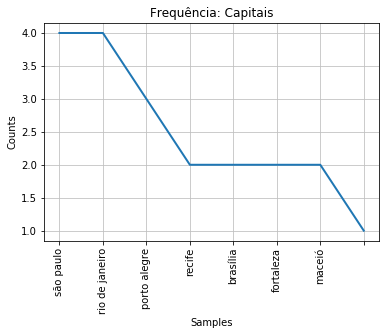

In [269]:
freq_cap.plot(title='Frequência: Capitais',cumulative=False)

Frequências das Palavras

In [270]:
#INSTANCIA UM OBJETO DO TIPO TweetTokenizer
#strip_handles=True -> irá remover mençoes a usuários do tweet
#reduce_len=True -> irá reduzir caracteres duplicados
#preserve_case=False -> irá alterar a forma da escrita, deixando tudo em minúsculo
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

#para tratar emoji's
non_bmp_map = dict.fromkeys(range(0x10000, sys.maxunicode + 1), 0xfffd)

In [272]:
print(len(palavras))
print(palavras)
#Tokeniza os tweets
tokens = tweet_tokenizer.tokenize(todos_tweets)
#Palavras que não agregam informações para serem tiradas
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords = stopwords + ['...','rt','é','https']

# remove a pontuação de cada palavra
table = str.maketrans('', '', string.punctuation)
palavras = [w.translate(table) for w in tokens]

index = 0
#Processo de limpeza de dados
for plv in palavras:
    result = plv.find(str('http'))
    if(result != -1):
        palavras.remove(plv)
        print(plv)
        print(len(palavras))
    else:
        for x in stopwords:
            if(x == plv):
                palavras.pop(index)
                print(x)
                print(len(palavras))
    index = index + 1
print(palavras)
print(len(palavras))

900
['arquivobbc', '50', 'anos', 'governo', 'investe', 'pesado', 'ações', 'manter', 'cidade', 'livre', 'detritos', 'substâncias', 'maléf', '…', 'rt', '', 'demonstrem', 'atitudes', 'a', 'real', 'intenção', 'governo', 'melhorar', 'sistema', 'prisional', '', 'susepe', 'necessita', 'efetivo', '…', '', '1366', 'dias', 'o', 'fim', 'governo', '“', 'nasci', 'ser', 'presidente', '', 'nasci', 'ser', 'militar', '”', 'gente', 'pode', 'ser', 'doente', '', 'vivem', 'falando', 'o', 'presidente', 'fascista', 'tentam', 'qualquer', 'forma', 'mostr', '…', 'rt', '', 'então', '', 'acontecendo', 'protesto', 'berlim', 'exigindo', 'atenção', 'governo', 'mudanças', 'clima', 'no', 'meio', 'ambiente', 'algu', '…', 'tudo', 'eu', 'deitei', 'sobre', 'governo', 'bolsonaro', '', 'aconteceu', '', 'sei', 'fico', 'feliz', 'triste', '', 'bosta', 'governo', '', '�', '', 'hoje', '', 'arrendados', '6', 'terminais', 'portuários', 'pará', '', 'superando', 'novamente', 'expectativas', '', 'total', '23', 'concessões', '…', '', 

In [252]:
freq_words = FreqDist(palavras)
aux = freq_words.most_common(100)
print(aux)

[('', 123), ('governo', 46), ('…', 41), ('o', 21), ('rt', 13), ('bolsonaro', 13), ('presidente', 9), ('a', 7), ('dias', 6), ('�', 6), ('não', 6), ('q', 6), ('“', 5), ('ser', 5), ('uma', 5), ('100', 5), ('”', 4), ('hoje', 4), ('um', 4), ('anos', 3), ('fim', 3), ('qualquer', 3), ('para', 3), ('3', 3), ('é', 3), ('mão', 3), ('e', 3), ('parece', 3), ('desse', 3), ('pra', 3), ('novo', 3), ('ministro', 3), ('alckmin', 3), ('ciro', 3), ('se', 3), ('50', 2), ('ações', 2), ('real', 2), ('nasci', 2), ('gente', 2), ('meio', 2), ('eu', 2), ('sobre', 2), ('campanha', 2), ('leandro', 2), ('karnal', 2), ('do', 2), ('meses', 2), ('maior', 2), ('jair', 2), ('diz', 2), ('contra', 2), ('reforma', 2), ('previdência', 2), ('13', 2), ('n', 2), ('dá', 2), ('todos', 2), ('educação', 2), ('agora', 2), ('tá', 2), ('foi', 2), ('rede', 2), ('ter', 2), ('tão', 2), ('harvard', 2), ('chama', 2), ('improvisado', 2), ('fala', 2), ('iminência', 2), ('grande', 2), ('lula', 2), ('olha', 2), ('são', 2), ('paulo', 2), ('vc

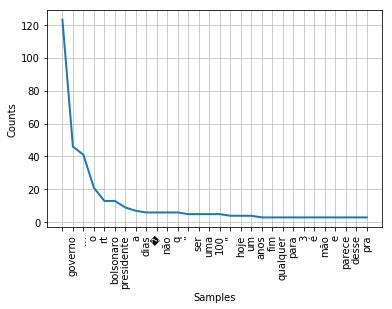

In [254]:
freq_words.plot(30)